# Heart disease detection 

In [13]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import ttest_rel
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


## Load Dataset

In [19]:
# LOAD DATASET

def get_df(path):
    df = pd.read_csv(path) 
    return df

df_path = "../../datasets/heart-disease.csv"

df = get_df(df_path)

display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Exercise 1

In [15]:
# Definir X (features) e Y (target)
X = df.drop(columns=['target'])
y = df['target']

 
#EX1A
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()

knn_scores = cross_val_score(knn, X, y, cv=skf)
nb_scores = cross_val_score(nb, X, y, cv=skf)


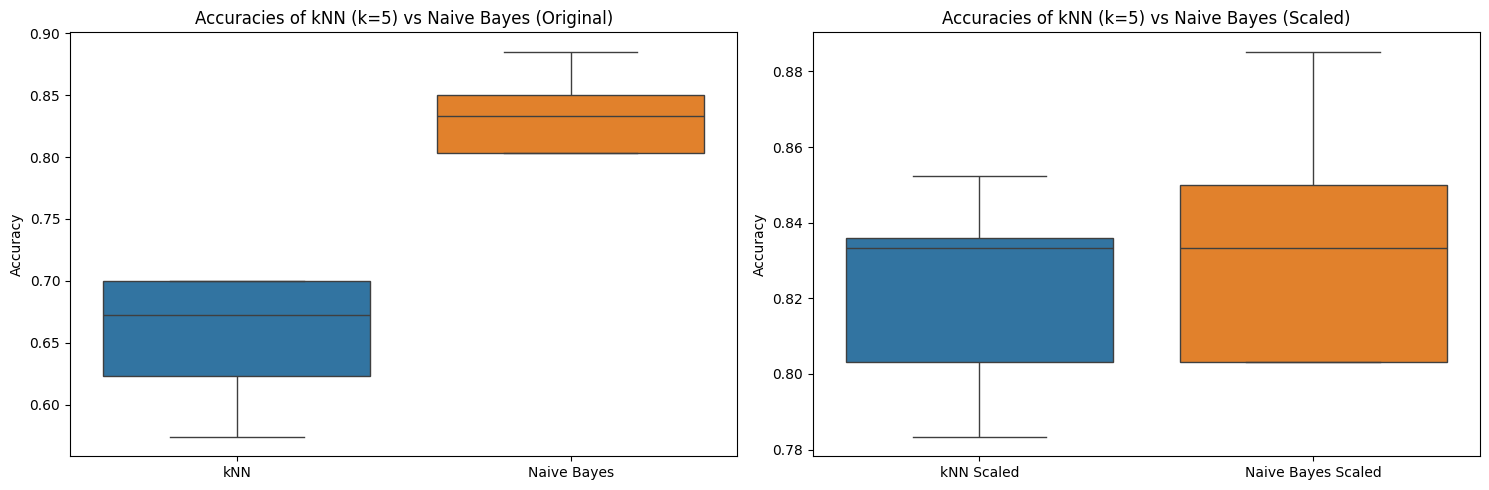

In [16]:
#EX1B

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply the same cross-validation process with scaled data
knn_scores_scaled = cross_val_score(knn, X_scaled, y, cv=skf)
nb_scores_scaled = cross_val_score(nb, X_scaled, y, cv=skf)



# Side by side subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# First Boxplot: original
sns.boxplot(data=[knn_scores, nb_scores], ax=axes[0])
axes[0].set_title('Accuracies of kNN (k=5) vs Naive Bayes (Original)')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['kNN', 'Naive Bayes'])
axes[0].set_ylabel('Accuracy')

# Second Boxplo: Min-Max scaled
sns.boxplot(data=[knn_scores_scaled, nb_scores_scaled], ax=axes[1])
axes[1].set_title('Accuracies of kNN (k=5) vs Naive Bayes (Scaled)')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['kNN Scaled', 'Naive Bayes Scaled'])
axes[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [17]:
#EX1C

t_stat, p_value = ttest_rel(knn_scores_scaled, nb_scores_scaled)

print(f"T-statistic: {t_stat}, p-value: {p_value}" '\n')
if p_value < 0.05:
    print('Since p_value < 0.05, we reject the null hypothesis concluding that the kNN algorithm is statistically superior.')
else:
    print('Since p_value > 0.05, we do not reject the null hypothesis concluding that the kNN algorithm is not statistically superior.')

print('In this case, due to the nature of the utilized function, we are considering the null hypothesis where the two samples have identical average values.')

# If p-value < 0.05, we reject the null hypothesis and conclude kNN is superior


T-statistic: -0.7270523395133756, p-value: 0.5074623897569328

Since p_value > 0.05, we do not reject the null hypothesis concluding that the kNN algorithm is not statistically superior.
In this case, due to the nature of the utilized function, we are considering the null hypothesis where the two samples have identical average values.


## Exercise 2

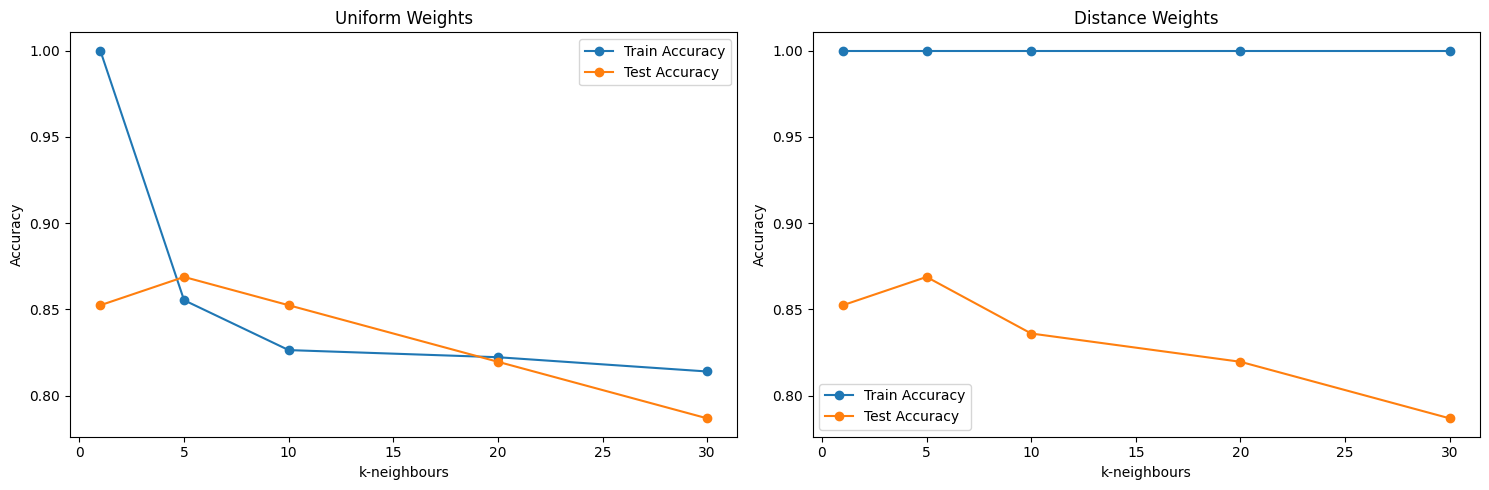

In [20]:
#EX2A

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

ks = [1, 5, 10, 20, 30]

train_acc_uniform = []
test_acc_uniform = []
train_acc_distance = []
test_acc_distance = []

for k in ks:
    
    # For uniform weights
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(X_train, y_train)
    train_acc_uniform.append(knn_uniform.score(X_train, y_train))
    test_acc_uniform.append(knn_uniform.score(X_test, y_test))

    # For distance weights
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(X_train, y_train)
    train_acc_distance.append(knn_distance.score(X_train, y_train))
    test_acc_distance.append(knn_distance.score(X_test, y_test))
    

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Uniform weights plot
axs[0].plot(ks, train_acc_uniform, label='Train Accuracy', marker='o')
axs[0].plot(ks, test_acc_uniform, label='Test Accuracy', marker='o')
axs[0].set_title('Uniform Weights')
axs[0].set_xlabel('k-neighbours')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Distance weights plot
axs[1].plot(ks, train_acc_distance, label='Train Accuracy', marker='o')
axs[1].plot(ks, test_acc_distance, label='Test Accuracy', marker='o')
axs[1].set_title('Distance Weights')
axs[1].set_xlabel('k-neighbours')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()
